In [ ]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/housing.csv

--2024-06-21 11:49:12--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.01s   

2024-06-21 11:49:12 (109 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
h = pd.read_csv('/content/housing.csv')
h

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
X , y = h.drop('median_house_value',axis=1),h['median_house_value'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))

In [ ]:
num_features=X_train.select_dtypes(include=[np.number]).columns
cat_features=X_train.select_dtypes(exclude=[np.number]).columns

In [ ]:
cat_pipeline=Pipeline([
    ('impute',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('one_hot',OneHotEncoder())
])

num_pipeline=Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

transformer=ColumnTransformer([
    ('cat_pipeline',cat_pipeline,cat_features),
    ('num_pipeline',num_pipeline,num_features)
])

In [ ]:
full_pipeline = Pipeline([
    ('preprocessing',transformer),
    ('rfr',RandomForestRegressor())
])

In [ ]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('one_hot',
                                                                   OneHotEncoder())]),
                                                  Index(['ocean_proximity'], dtype='object')),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object'))])),
                ('rfr', RandomForestRegressor())])

In [ ]:
full_pipeline.score(X_train,y_train),full_pipeline.score(X_test,y_test)

(0.974568750408234, 0.8306117603465953)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'rfr__n_estimators':[50,75,100],
    'rfr__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'rfr__n_jobs':[-1]
}
randCV = RandomizedSearchCV(full_pipeline, param_grid, cv=5)
randCV.fit(X_train[:1000], y_train[:1000])


KeyboardInterrupt: 

In [ ]:
randCV.best_params_

In [ ]:
randCV.best_estimator_.fit(X_train,y_train)

In [ ]:
randCV.score(X_test,y_test),randCV.score(X_train,y_train)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector

In [ ]:
from sklearn.compose import make_column_selector

X, y = h.drop('median_house_value', axis=1), h['median_house_value'].copy()
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

<Axes: >

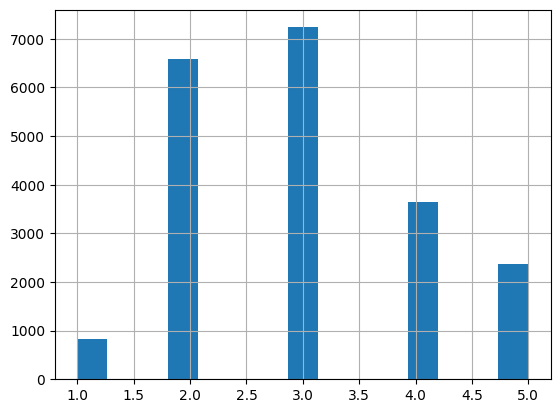

In [ ]:
h['income_cat'] = pd.cut(h['median_income'],
                         bins = [0.,1.5,3.0,4.5,6,np.inf],
                         labels = [1,2,3,4,5])
h['income_cat'].hist(bins=15)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=h['income_cat'])
X_train.shape,X_test.shape,y_train.shape,y_test.shape
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6041,-118.28,33.74,16.0,855.0,271.0,486.0,250.0,0.7591,NEAR OCEAN
5009,-118.33,33.91,8.0,10731.0,3335.0,7211.0,3028.0,2.4550,<1H OCEAN
7792,-117.97,33.73,18.0,3698.0,574.0,2046.0,614.0,6.2984,<1H OCEAN
15139,-121.01,37.68,33.0,3230.0,587.0,1579.0,560.0,3.5775,INLAND
10353,-124.11,40.57,33.0,1348.0,234.0,573.0,236.0,2.4896,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
3150,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN
17612,-120.84,35.30,15.0,2062.0,327.0,781.0,316.0,4.9359,NEAR OCEAN
7599,-122.27,37.90,52.0,2041.0,270.0,671.0,253.0,6.9414,NEAR BAY
6249,-117.87,34.15,24.0,5745.0,735.0,2061.0,679.0,8.2827,INLAND


In [ ]:
preprocessing.fit_transform(X_train)

array([[ 1.55997805e+00, -7.91159389e-01, -1.05872232e-01, ...,
         6.44688220e-01, -8.87598941e-01, -9.97813352e-01],
       [ 1.46666017e+00, -7.42477613e-01, -6.41503150e-02, ...,
         6.19738338e-01, -8.07990969e-01, -1.63367206e+00],
       [-8.83393477e-01,  2.31319074e-01,  2.65353283e-02, ...,
         7.99377491e-01, -8.92281763e-01, -8.38848674e-01],
       ...,
       [-1.22980627e+00,  1.03443346e+00, -3.83283853e-02, ...,
        -1.34631240e+00,  1.06045497e+00,  1.86355085e+00],
       [-1.29553221e+00,  1.18912444e+00, -1.78238613e-03, ...,
         8.49277256e-01, -6.95603244e-01, -3.61954639e-01],
       [-1.03932472e+00,  9.22023770e-01, -2.35433844e-02, ...,
         5.39898714e-01, -7.47114285e-01,  1.54562150e+00]])

In [ ]:
X_test_transformed = preprocessing.transform(X_test)
X_train_transformed = preprocessing.fit_transform(X_train)

feature_name = preprocessing.get_feature_names_out()
X_train_transformed = pd.DataFrame(X_train_transformed,columns = feature_name)
X_test_transformed = pd.DataFrame(X_test_transformed,columns = feature_name)

X_train_transformed


,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age
0,1.559978,-0.791159,-0.105872,-0.617376,-1.167025,-1.130449,-0.627436,-3.229186,0.0,0.0,0.0,0.0,1.0,0.644688,-0.887599,-0.997813
1,1.466660,-0.742478,-0.064150,2.832006,2.195298,2.509275,2.779075,-0.735452,1.0,0.0,0.0,0.0,0.0,0.619738,-0.807991,-1.633672
2,-0.883393,0.231319,0.026535,0.413973,0.779357,0.809322,0.599759,1.266270,1.0,0.0,0.0,0.0,0.0,0.799377,-0.892282,-0.838849
3,-0.482842,0.131167,-0.022356,0.444749,0.599518,0.459682,0.474029,0.064536,0.0,1.0,0.0,0.0,0.0,-0.717575,0.957433,0.353386
4,-0.605860,0.109171,-0.059713,-0.819105,-0.561922,-0.908222,-0.706144,-0.705718,1.0,0.0,0.0,0.0,0.0,-2.264468,2.310768,0.353386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-0.295144,-0.091479,-0.094902,1.068204,1.114615,0.698005,1.144607,0.703751,1.0,0.0,0.0,0.0,0.0,0.470039,-0.653458,-1.554190
16508,-0.832561,0.428726,-0.055559,-0.359245,0.003014,-0.490306,-0.307460,0.748379,0.0,0.0,0.0,0.0,1.0,-0.632746,-0.157079,-1.077296
16509,-1.229806,1.034433,-0.038328,-0.622456,-0.010591,-0.695163,-0.611144,1.472797,0.0,0.0,0.0,1.0,0.0,-1.346312,1.060455,1.863551
16510,-1.295532,1.189124,-0.001782,0.753731,1.364872,0.819179,0.737192,1.848139,0.0,1.0,0.0,0.0,0.0,0.849277,-0.695603,-0.361955


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

models = [
    LinearRegression(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

for model in models:
  model.fit(X_train_transformed,y_train)
  print(model.__class__.__name__,model.score(X_test_transformed,y_test))

LinearRegression 0.6035782086311589
SVR -0.06154221622754941
DecisionTreeRegressor 0.6319874109861332
RandomForestRegressor 0.8077759357269809
GradientBoostingRegressor 0.7843904362945721


In [ ]:
random_forest_pipeline = Pipeline([
    ('preprocessing',preprocessing),
    ('random_forest',RandomForestRegressor())
])

random_forest_pipeline.fit(X_train,y_train)
random_forest_pipeline.score(X_test,y_test)

0.8061906446468318

In [ ]:
random_forest_pipeline.predict(X_test.iloc[[2]])

array([277384.])

In [ ]:
y_test.iloc[[2]]

5927    212500.0
Name: median_house_value, dtype: float64